In [3]:
%load_ext autoreload
%autoreload 2  """Reloads all functions automatically"""
%matplotlib notebook

from irreversible_stressstrain import StressStrain as strainmodel
import test_suite as suite
import graph_suite as plot
import numpy as np

model = strainmodel('ref/HSRS/22').get_experimental_data()

slopes = suite.get_slopes(model)
second_deriv_slopes = suite.get_slopes(suite.combine_data(model[:-1,0],slopes))

# -- we think that yield occurs where the standard deviation is decreasing AND the slopes are mostly negative
def findYieldInterval(slopes, numberofsections):
    
    def numneg(val):
        return sum((val<0).astype(int))
    
    # -- divide into ten intervals and save stddev of each
    splitslopes = np.array_split(slopes,numberofsections)
    splitseconds = np.array_split(second_deriv_slopes,numberofsections)
        
    # -- displays the number of negative values in a range (USEFUL!!!)
    for section in splitslopes:
        print numneg(section), len(section)
        
    print "-------------------------------" 
    
    for section in splitseconds:
        print numneg(section), len(section)

    divs = [np.std(vals) for vals in splitslopes]
    
    # -- stddev of the whole thing
    stdev = np.std(slopes)
    
    interval = 0
    
    slopesect = splitslopes[interval]
    secondsect = splitseconds[interval]
    
    print divs, stdev
    
    # -- the proportion of slope values in an interval that must be negative to determine that material yields
    cutoff = 3./4.
    
    while numneg(slopesect)<len(slopesect)*cutoff and numneg(secondsect)<len(secondsect)*cutoff:
        
        interval = interval + 1
        
        """Guard against going out of bounds"""
        if interval==len(splitslopes): break
            
        slopesect = splitslopes[interval]
        secondsect = splitseconds[interval]                                       
    
    print 
    print interval
    return interval

numberofsections = 15
interval_length = len(model)/numberofsections

"""
Middle of selected interval

Guard against going out of bounds
"""
yield_interval = findYieldInterval(slopes,numberofsections)
yield_index = min(yield_interval*interval_length + interval_length/2,len(model[:])-1) 
yield_value = np.array(model[yield_index])[None,:]

print 
print yield_value

9 18
9 18
6 18
13 18
6 18
3 18
10 17
3 17
2 17
6 17
8 17
10 17
5 17
8 17
9 17
-------------------------------
9 18
10 18
11 18
7 18
8 18
9 17
7 17
8 17
9 17
7 17
9 17
9 17
9 17
10 17
8 17
[5541.7766300054009, 1130.1050382995807, 206.15448932657284, 1715.0729506094001, 1006.5319683583111, 211.84733851967869, 48.696494230800624, 29.03240086835461, 36.499604939329146, 29.665834653640491, 26.478056069311805, 38.349696543136389, 30.852118972258211, 47.043996580356165, 68.012199348965737] 1589.11298719

15

[[   16.68366237  1080.26033278]]


## Make these estimates more reliable and robust

<IPython.core.display.Javascript object>


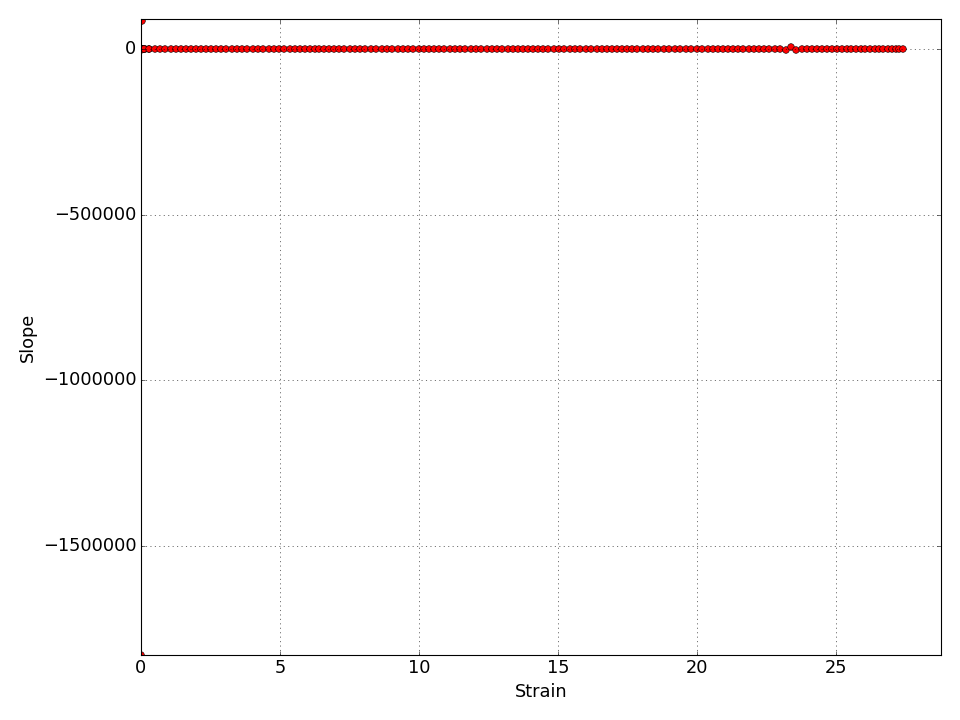

<IPython.core.display.Javascript object>


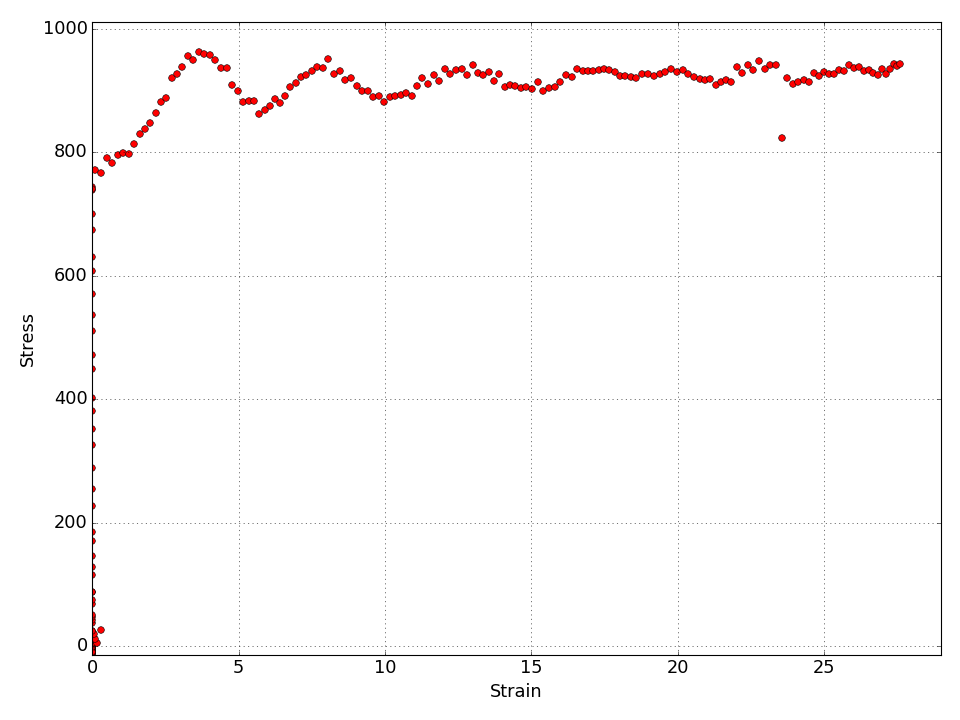

In [68]:
model = strainmodel('ref/HSRS/326').get_experimental_data()

strain = model[:,0]
stress = model[:,1]

slopes = suite.get_slopes(model)
second_deriv = suite.get_slopes(suite.combine_data(model[:-1,0],slopes))


"""Now what if we have strain vs slope"""
strainvslope = suite.combine_data(strain,slopes)
strainvsecond = suite.combine_data(strain,second_deriv)
plot.plot2D(strainvsecond,'Strain','Slope',marker="ro")
plot.plot2D(model,'Strain','Stress',marker="ro")

In [14]:
model = strainmodel('ref/HSRS/326').get_experimental_data()

strain = model[:,0]
stress = model[:,1]

slopes = suite.get_slopes(model)
second_deriv = suite.get_slopes(suite.combine_data(model[:-1,0],slopes))

num_intervals = 80

interval_length = len(second_deriv)/num_intervals
split_2nd_derivs = np.array_split(second_deriv,num_intervals)

print np.mean(second_deriv)
down_index = 0

for index, section in enumerate(split_2nd_derivs):
    if sum(section)<np.mean(slopes):
        down_index = index
        break
        
yield_index = down_index*interval_length

print strain[yield_index], stress[yield_index]

-6666.04436529
0.0 5.145343902


<IPython.core.display.Javascript object>


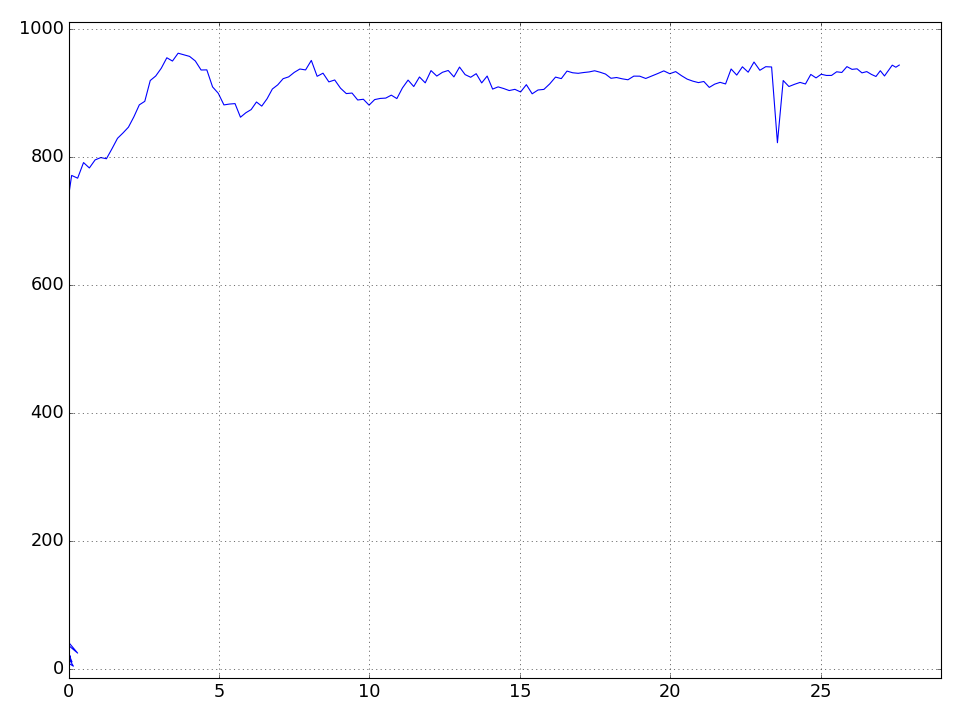

<IPython.core.display.Javascript object>


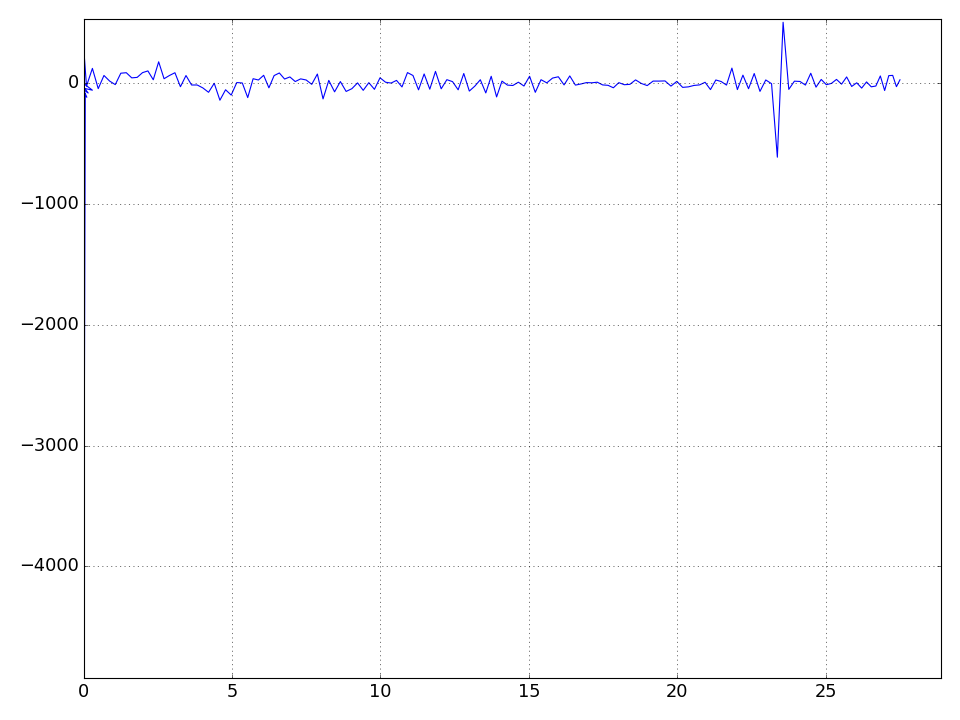

<IPython.core.display.Javascript object>


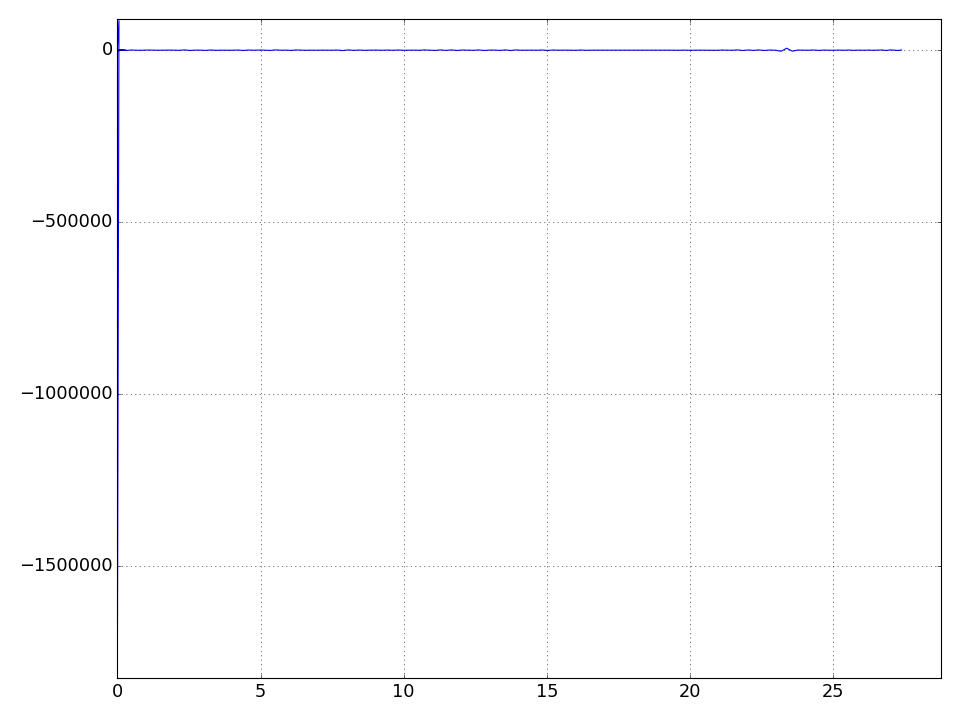

In [7]:
model = strainmodel('ref/HSRS/326').get_experimental_data()

strain = model[:,0]
stress = model[:,1]

first_deriv = suite.get_slopes(model)
second_deriv = suite.get_slopes(suite.combine_data(model[:-1,0],first_deriv))

plot1 = suite.combine_data(strain,first_deriv)
plot2 = suite.combine_data(strain,second_deriv)

plot.plot2D(model)
plot.plot2D(plot1)
plot.plot2D(plot2)

### See when standard deviation of second derivative begins to decrease

In [8]:
model = strainmodel('ref/HSRS/222').get_experimental_data()

strain = model[:,0]
stress = model[:,1]

first_deriv = suite.get_slopes(model)
second_deriv = suite.get_slopes(suite.combine_data(model[:-1,0],first_deriv))


ave_deviation = np.std(second_deriv)
deviation_second = [np.std(val) for val in np.array_split(second_deriv,30)]

yielding = 0


for index,value in enumerate(deviation_second):
    
    if value != 0.0 and value<ave_deviation and index!=0:
        yielding = index
        break
    
print second_deriv
#print "It seems to yield at index:", yielding
        
#print "These are all of the standard deviations, by section:", deviation_second, "\n"
#print "The overall standard deviation of the second derivative is:", ave_deviation

[    0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
    

## The actual yield values are as follows (These are approximate):
### ref/HSRS/22:  Index 106 [1.3912797535, 900.2614980977]
### ref/HSRS/222: Index 119 [0, 904.6702299]
### ref/HSRS/326: Index 150 [6.772314989, 906.275032]

### Index of max standard deviation of the curve

In [66]:
model = strainmodel('ref/HSRS/22').get_experimental_data()

strain = model[:,0]
stress = model[:,1]

first_deriv = suite.get_slopes(model)
second_deriv = suite.get_slopes(suite.combine_data(model[:-1,0],first_deriv))

print second_deriv;
return;

chunks = 20
int_length = len(model[:])/chunks

deriv2spl = np.array_split(second_deriv,chunks)
deviation_second = [abs(np.mean(val)) for val in deriv2spl]

del(deviation_second[0])
print deviation_second
print np.argmax(deviation_second)
#print "The standard deviation of all the second derivatives is", np.std(second_deriv)

[ -7.76721827e+05  -7.11985507e+05   5.81422420e+06  -4.71471809e+06
   5.38641028e+06  -4.56214023e+06  -1.47978263e+04   3.87732270e+05
  -9.93015554e+04  -9.29494291e+06   1.60701493e+07  -1.20516718e+07
   1.13624590e+08   1.64835742e+08  -5.06672773e+06   2.29989414e+07
   1.09368986e+06   2.07889789e+06  -4.41745241e+06   2.01049954e+06
  -3.30783576e+06   1.68017207e+06   4.12439919e+04  -4.01957378e+05
  -1.20699492e+05  -1.23165837e+05  -2.66198835e+05   3.31631221e+04
   8.02841749e+04  -3.96416985e+05   4.51099456e+05  -1.57914399e+05
  -5.91717842e+04   1.61009661e+05  -1.88063949e+05   1.38439177e+05
  -9.52232980e+04   5.24562224e+04  -1.10151968e+04  -3.97584349e+04
   1.17486078e+04  -1.14553167e+04   6.00884875e+03   2.35124595e+03
  -1.04245584e+04   6.40640497e+03  -3.25928214e+03   1.11984469e+04
  -2.95013722e+03  -4.86681203e+03  -8.97662427e+03   2.67297076e+04
  -6.03511177e+03  -9.23829988e+03   3.72043629e+04   7.57754313e+03
   1.58171294e+05   6.19987302e+05

SyntaxError: 'return' outside function (<ipython-input-66-a301b46223dc>, line 10)

### If our data dips, we can attempt to find local maxima

In [4]:
import numpy as np

# -- climbs a discrete dataset to find local max
def hillclimber(data, guessindex = 0):
    
    x = data[:,0]
    y = data[:,1]
    
    curx = x[guessindex]
    cury = y[guessindex]
    
    guessleft = max(0,guessindex-1)
    guessright = min(len(x)-1,guessindex+1)
    
    done = False
    
    while not done:
        
        left  = y[guessleft]
        right = y[guessright]

        difleft = left-cury
        difright = right-cury

        if difleft<0 and difright<0 or (difleft==0 and difright==0):
            done = True
        elif difleft>difright:
            cur = left
            guessindex = guessleft
        elif difright>difleft or difright==difleft:
            cur = right
            guessindex = guessright
        
    return guessindex

func = lambda x: x**2
xs = np.linspace(0.,10.,5)
ys = func(xs)

data = suite.combine_data(xs,ys)
print hillclimber(data)
    

KeyboardInterrupt: 